# 로지스틱 회귀분석 (분류모델)

__종속변수가 양적척도가 아닌 질적척도.__ 
즉, 로지스틱회귀분석은 특정 수치를 예측하는 것이 아니라 어떤 카테고리에 들어갈지 분류를 하는 모델 (기본모형: 이진분류 0과 1 / 3개 이상일 경우 다항 로지스틱 회귀분석)

__종속변수를 1이 될 확률로 변환하여 그 확률에 따라 0과 1의 여부를 예측__
- 오즈(Odds)와 로짓 변환: 
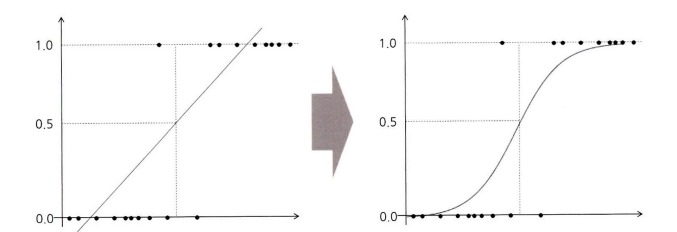

    1) 로짓선으로 변환하는 이유 <br>
    선형회귀선은 확률이 양의 음의 무한대로 뻗어나가기 때문에, 확률을 표현하기 적절하지 않다. 따라서 0과 1 사이의 S자 곡선의 형태로 변환해야 한다. **종속변수의 값을 1이 될 확률이라 정의하고 값이 0.5보다 큰 경우 1, 작은 경우 0으로 분류** 

    2) 로짓선으로 변환하기 위해 `오즈값`을 구해야 한다. <br>
    오즈(Odds) = 사건이 `발생할 가능성`이 `발생하지 않을 가능성`보다 어느정도 큰 지를 나타내는 값
    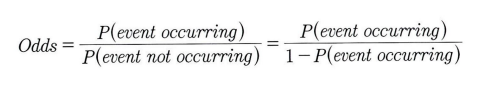

    직선 형태의 회귀 값을 오즈값으로 변환하면, 발생확률이 1에 가까워질수록 오즈 값은 기하급수적으로 커지고 최솟값은 0이 된다. (ex. 발생할 확률이 60%, 발생하지 않을 확률이 40%이면, 오즈값은 1.5 -> 발생할 확률이 80%, 발생하지 않을 확률이 20%이면, 오즈값은 4)

    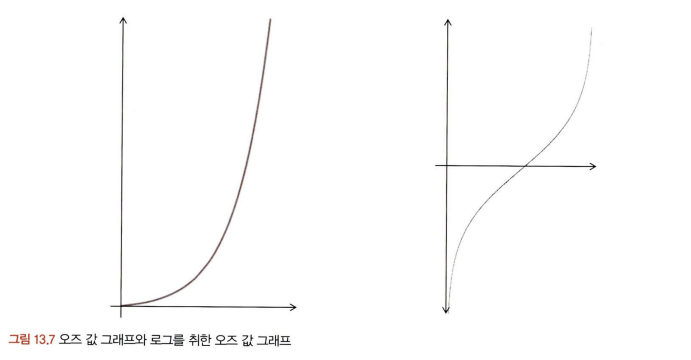

    그래서 오즈값에 `로그`를 취하면 양의 무한대에서 음의 무한대를 갖는 형태가 된다. 이렇게 로그를 취해 확률의 범위를 표현할 수 있다. 하지만 여전히 0과 1사이의 범위를 나타내지 못한다.
    그래서 확률을 `로짓변환` 하여 0과 1 사이로 치환해준다. 이러한 변환식을 `시그모이드함수`라고 한다. 

__카테고리를 분류하는 임계치를 어떻게 설정하는지가 중요하다__
- 기본적으로 분류 기준값은 0.5이지만, 어떤 주제의 모델인가에 따라 임계치의 기준이 달라질 수 있다. 

__다항 로지스틱 회귀분석?__
- 종속변수의 모든 범주에 해당하는 확률의 합을 100%로 하고 범주들 간에 확률이 어느 것이 더 큰지를 알아야 하기 떄문에 하나의 범주를 기준으로 잡는다.
- 따라서 다항 로지스틱 회귀분석은 이항 로지스틱 식이 K-1개가 필요하다. 

## **심장병발생_확률_데이터**

### 1. 패키지 설치 및 데이터 로드

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import *
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.Supervised_Learning\1.Classification\4.Logistic_Regression\datasets\2020\heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

### 2. 전처리
#### 1) 명목형 변수
- get_dummies를 이용해 0과 1로 바꿔주기

In [30]:
df2 = pd.get_dummies(df, df.select_dtypes('object').columns, drop_first=True)
df2 = df2.astype(float)
df2.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,20.34,0.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,26.58,20.0,30.0,8.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,24.21,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,23.71,28.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### 2) 연속형 변수
- 범위가 크므로, scaling 해야한다.

In [31]:
# 연속형 변수 컬럼만 추출
num_cols = list(df.select_dtypes(np.number).columns)
df_num = df2[num_cols]
df_num

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0
...,...,...,...,...
319790,27.41,7.0,0.0,6.0
319791,29.84,0.0,0.0,5.0
319792,24.24,0.0,0.0,6.0
319793,32.81,0.0,0.0,12.0


In [32]:
# Robust Scaling
RobustScaler = RobustScaler()
num_scaled=RobustScaler.fit_transform(df_num) 
num_scaled

array([[-1.45331529,  1.5       , 10.        , -1.        ],
       [-0.94722598,  0.        ,  0.        ,  0.        ],
       [-0.10284168, 10.        , 10.        ,  0.5       ],
       ...,
       [-0.41948579,  0.        ,  0.        , -0.5       ],
       [ 0.74018945,  0.        ,  0.        ,  2.5       ],
       [ 2.60081191,  0.        ,  0.        ,  0.5       ]])

In [33]:
# dataframe
df_num = pd.DataFrame(num_scaled, columns=num_cols)
df_num.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,-1.453315,1.5,10.0,-1.0
1,-0.947226,0.0,0.0,0.0
2,-0.102842,10.0,10.0,0.5
3,-0.423545,0.0,0.0,-0.5
4,-0.491204,14.0,0.0,0.5


#### 3) 합치기

In [42]:
df_cate = df2.drop(num_cols, axis=1)
df_cate.head()

,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
# concat
df3 = pd.concat([df_num, df_cate], axis=1)
df3.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-1.453315,1.5,10.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,-0.947226,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.102842,10.0,10.0,0.5,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.423545,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.491204,14.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 3. 학습셋과 테스트셋 분리

In [44]:
# 독립변수와 종속변수를 분리하여 생성
X  = df3.drop(['HeartDisease_Yes'], axis=1)
y = df3[['HeartDisease_Yes']]

# 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239846, 37), (79949, 37), (239846, 1), (79949, 1))

### 4. 종속변수 클래스 분포 시각화

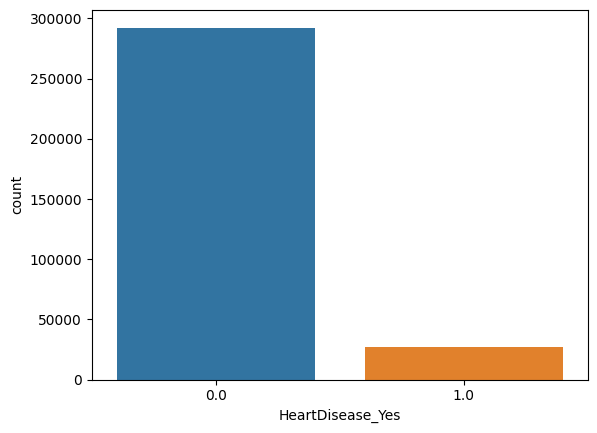

In [46]:
sb.countplot(x=df3['HeartDisease_Yes'])
plt.show()

> 종속변수의 0과 1 클래스 비율 확인 -> 1 값이 10%미만으로 클래스 불균형이 심한 상황. 따라서 언더샘플링이나 오버샘플링을 적용하여 클래스 균형을 맞춰 줘야 한다.

> 클래스 0 일부 샘플을 제거하여 클래스 1의 수와 비슷하게 맞춰야 함

>언더샘플링은 데이터셋의 크기를 줄여서 계산 비용을 절감하고, 모델의 성능을 향상시킬 수 있는 잠재력이 있습니다. 그러나 너무 많은 샘플을 제거하면 유용한 정보를 손실할 수 있고, 모델이 다수 클래스에 대한 학습을 충분히 할 수 없게 될 수 있습니다. 따라서 언더샘플링을 적용할 때에는 적절한 샘플 수를 제거하는 것이 중요합니다.

### 5. 언더샘플링을 위해 변수명 임시 변경

In [47]:
X_train_re = X_train.copy()
y_train_re = y_train.copy()

X_temp_name = ['X1', 'X2','X3','X4','X5','X6','X7','X8','X9','X10',
               'X11','X12','X13','X14','X15','X16','X17','X18','X19','X20',
               'X21','X22','X23','X24','X25','X26','X27','X28','X29','X30',
                'X31','X32','X33','X34','X35','X36','X37']
y_temp_name = ['y1']

X_train_re.columns = X_temp_name
y_train_re.columns = y_temp_name

X_train_re.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37
163572,-0.202977,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150901,1.476319,0.0,0.0,0.5,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
164527,-0.248985,15.0,10.0,-2.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
260971,0.805142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262287,0.612991,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### 6. 언더 샘플링 적용

In [48]:
X_train_under, y_train_under = RandomUnderSampler(random_state=0).fit_resample(X_train_re, y_train_re)

print('RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트:', X_train_re.shape, y_train_re.shape )
print('RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트:', X_train_under.shape, y_train_under.shape )
print('RandomUnderSampler 적용 전 레이블 값 분포 세트:', pd.Series(y_train_re['y1']).value_counts())
print('RandomUnderSampler 적용 후 레이블 값 분포 세트:', pd.Series(y_train_under['y1']).value_counts())

RandomUnderSampler 적용 전 학습셋 변수/레이블 데이터 세트: (239846, 37) (239846, 1)
RandomUnderSampler 적용 후 학습셋 변수/레이블 데이터 세트: (41036, 37) (41036, 1)
RandomUnderSampler 적용 전 레이블 값 분포 세트: y1
0.0    219328
1.0     20518
Name: count, dtype: int64
RandomUnderSampler 적용 후 레이블 값 분포 세트: y1
0.0    20518
1.0    20518
Name: count, dtype: int64


### 7. 기존 칼럼명 적용

In [49]:
X_train_under.columns = list(X_train)
y_train_under.columns = list(y_train)

X_train_under.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
69819,-0.572395,0.0,1.666667,0.5,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
248332,2.365359,6.0,0.333333,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
31381,-0.964817,0.0,2.666667,0.5,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
152264,-1.246279,0.0,0.000000,-0.5,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
90674,0.668471,15.0,0.000000,0.5,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### 8. 학습셋에 sklearn 로지스틱 회귀모델 적용

In [50]:
logit = LogisticRegression()
logit.fit(X_train_under, y_train_under)

print('학습셋 모델 정확도:', logit.score(X_train_under, y_train_under))

c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습셋 모델 정확도: 0.7645969392728336


c:\Users\hanjieun_2\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 9. 테스트셋에 sklearn 로지스틱 회귀모델 적용

In [51]:
print('테스트 셋 모델 정확도:', logit.score(X_test, y_test))

테스트 셋 모델 정확도: 0.7501532226794582


> 학습셋과 거의 차이가 없기 때문에 과적합이나 과소적합이 없을 것으로 판단

### 10. 계숫값 확인
- 각 독립변수의 영향력을 확인하기 위함
- 하지만 계숫값은 직관적이지 않기 때문에 참고용으로만 확인!

In [52]:
print(logit.coef_)

[[ 8.00521226e-02  1.18986190e-02  2.93472104e-02 -5.47150728e-02
   4.06132901e-01 -2.46565677e-01  1.28132166e+00  2.00103470e-01
   7.59862732e-01 -5.77017456e-02  3.97576476e-01  4.15781861e-01
   7.87311538e-01  1.07625062e+00  1.52827895e+00  1.76608463e+00
   2.04618541e+00  2.33239812e+00  2.68454362e+00  2.84133594e+00
   3.20264304e+00 -5.28907907e-01 -2.43465364e-01 -1.83591285e-01
  -9.68682988e-02 -5.98437917e-02  2.81303976e-01  4.80119998e-01
   4.37371414e-01 -1.86079749e-03  1.49909746e+00  1.02742066e+00
   1.81053179e+00  4.45403506e-01  2.94804158e-01  6.17100551e-01
   1.41364349e-01]]


### 11. 테스트셋에 statsmodels 로지스틱 회귀모델 적용

In [53]:
# sklearn이 아닌 statsmodels에 있는 로지스틱 회귀모델을 적용해보자.
logit2 = sm.Logit(y_train_under, X_train_under)
results = logit2.fit(method='newton') #method='newton' : Newton-Raphson-iteration알고리즘으로 최적화에 용이한 것

results.summary()

Optimization terminated successfully.
         Current function value: 0.503919
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       HeartDisease_Yes   No. Observations:                41036
Model:                          Logit   Df Residuals:                    40999
Method:                           MLE   Df Model:                           36
Date:                Wed, 28 Feb 2024   Pseudo R-squ.:                  0.2730
Time:                        14:35:31   Log-Likelihood:                -20679.
converged:                       True   LL-Null:                       -28444.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
BMI                                  0.0918      0.015      6.056      0.000       0.062       0.121
PhysicalHealth                       0.0114      0.003      3.367      0.001       0.005       0.018
MentalHealth                         0.0170      0.005      3.478      0.001       0.007       0.027
SleepTime                           -0.0733      0.016     -4.619      0.000      -0.104      -0.042
Smoking_Yes                          0.3696      0.025     14.807      0.000       0.321       0.419
AlcoholDrinking_Yes                 -0.2732      0.053     -5.107      0.000      -0.378      -0.168
Stroke_Yes                           1.2616      0.054     23.555      0.000       1.157       1.367
DiffWalking_Yes                      0.1708      0.035      4.907      0.000       0.103       0.239
Sex_Male                             0.6680      0.025     26.580      0.000       0.619       0.717
AgeCategory_25-29                   -1.4044      0.127    -11.088      0.000      -1.653      -1.156
AgeCategory_30-34                   -0.9200      0.103     -8.905      0.000      -1.122      -0.717
AgeCategory_35-39                   -0.9326      0.097     -9.634      0.000      -1.122      -0.743
AgeCategory_40-44                   -0.5486      0.089     -6.190      0.000      -0.722      -0.375
AgeCategory_45-49                   -0.2661      0.082     -3.244      0.001      -0.427      -0.105
AgeCategory_50-54                    0.1993      0.076      2.636      0.008       0.051       0.348
AgeCategory_55-59                    0.4354      0.072      6.049      0.000       0.294       0.576
AgeCategory_60-64                    0.7295      0.070     10.414      0.000       0.592       0.867
AgeCategory_65-69                    1.0211      0.070     14.680      0.000       0.885       1.157
AgeCategory_70-74                    1.3695      0.070     19.549      0.000       1.232       1.507
AgeCategory_75-79                    1.5302      0.073     20.958      0.000       1.387       1.673
AgeCategory_80 or older              1.8668      0.072     25.936      0.000       1.726       2.008
Race_Asian                          -2.6688      0.120    -22.307      0.000      -2.903      -2.434
Race_Black                          -2.3371      0.081    -28.721      0.000      -2.497      -2.178
Race_Hispanic                       -2.3334      0.080    -29.136      0.000      -2.490      -2.176
Race_Other                          -2.2070      0.093    -23.681      0.000      -2.390      -2.024
Race_White                          -2.1554      0.069    -31.379      0.000      -2.290      -2.021
Diabetic_No, borderline diabetes     0.2903      0.078      3.734      0.000       0.138       0.443
Diabetic_Yes                         0.4801      0.032     14.907      0.000       0.417       0.543
Diabetic_Yes (during pregnancy)      0.2256      0.164      1.376      0.169      -0.096       0.547
PhysicalA

> statsmodel에서도 sklearn과 같이 계숫값을 확인할 수 있고, sklearn에서는 확인하지 못하는 p-value값을 구할 수 있다. 해당 변수들은 모두 유의미한 것으로 나타났다.(p-value<0.5)

### 12. 독립변수의 오즈비 확인

In [55]:
np.exp(results.params)

BMI                                 1.096091
PhysicalHealth                      1.011469
MentalHealth                        1.017101
SleepTime                           0.929300
Smoking_Yes                         1.447148
AlcoholDrinking_Yes                 0.760970
Stroke_Yes                          3.530911
DiffWalking_Yes                     1.186292
Sex_Male                            1.950422
AgeCategory_25-29                   0.245524
AgeCategory_30-34                   0.398530
AgeCategory_35-39                   0.393534
AgeCategory_40-44                   0.577770
AgeCategory_45-49                   0.766331
AgeCategory_50-54                   1.220555
AgeCategory_55-59                   1.545532
AgeCategory_60-64                   2.074125
AgeCategory_65-69                   2.776307
AgeCategory_70-74                   3.933446
AgeCategory_75-79                   4.619038
AgeCategory_80 or older             6.467417
Race_Asian                          0.069335
Race_Black

> BMI가 한 단위 증가할 때마다 심장병 발생확률이 1.096배 높아진다. <br>
> PhysicalHealth가 한 단위 증가할 때마다 심장병 발생확률이 약 1.011배 높아진다. <br>
> MentalHealth가 한 단위 증가할 때마다 심장병 발생확률이 약 1.017배 높아진다. <br>
> SleepTime이 한 단위 증가할 때마다 심장병 발생확률이 약 0.929배 낮아진다. <br>
> Smoking Yes 즉, 흡연을 하는 사람이 심장병 발생확률이 1.447배 높아진다.